## DSSG 2019 | Imperial College London 

**June 2019**

### Visualization

+ Before we start!
+ Matplotlib
+ Seaborn

***
### About visualization titles!

The **title** of a visualization occupies the most valuable real estate on the page. If nothing else, you can be reasonably sure a viewer will at least read the title and glance at your visualization. This is why you want to put thought into making a clear and effective title that acts as a narrative for your chart. Many novice visualizers default to an explanatory title, something like: "Average Wages Over Time (2006-2016)". This title is correct - it just isn't very useful. This is particularly true since any good graph will have explained what the visualization is through the axes and legends. Instead, use the title to reinforce and explain the core point of the visualization. It should answer the question "Why is this graph important?" and focus the viewer onto the most critical take-away.

***

#### Matplotlib

There are a lot of data visualization options for Python (see the Additional Resources section)

Lets get some data from nyc-311 complains. Go to your terminal and put: 

`curl -O https://raw.githubusercontent.com/avishekrk/pandas-cookbook/master/data/311-service-requests.csv`

+ What does `curl` does? (You can read the manual for curl with `man curl`)

Now we are going to read the csv with pandas and start to make some plots. 

In [1]:
import pandas as pd
import os


# visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# so images get plotted in the notebook
%matplotlib inline

In [2]:
os.chdir('.')

In [3]:
calls = pd.read_csv("311-service-requests.csv")
calls.shape

/home/lmillan/.pyenv/versions/3.5.2/envs/python_3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(111069, 52)

In [4]:
calls.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


Lets make a simple hist with the calls recieved per agency. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe3c5d5a20>]],
      dtype=object)

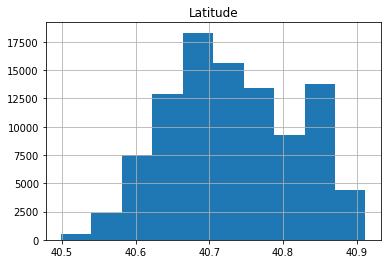

In [5]:
# and view a simple hist of the Latitude distribution 
calls.hist(column='Latitude')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe94058630>]],
      dtype=object)

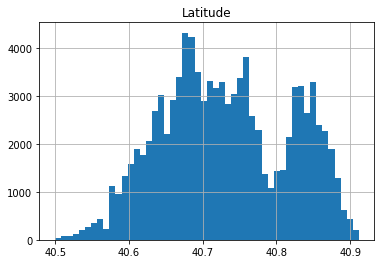

In [6]:
# one default we may want to change for histograms is the number of bins
calls.hist(column='Latitude', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe3c4824e0>]],
      dtype=object)

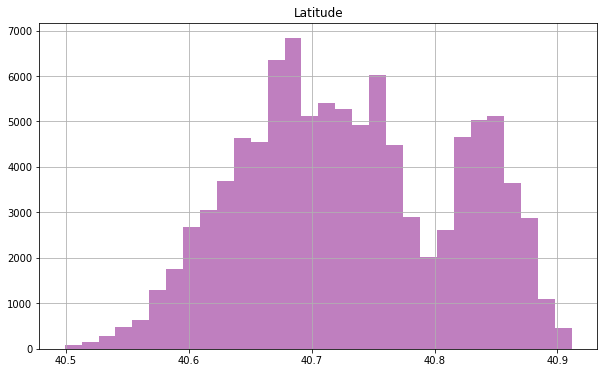

In [8]:
## We can change options within the hist function (e.g. number of bins, color, transparency):
calls.hist(column='Latitude', bins=30, facecolor="purple", alpha=0.5, figsize=(10,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe3c491080>]],
      dtype=object)

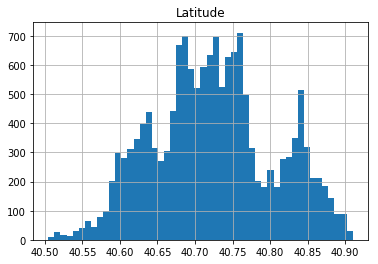

In [9]:
## lets subset the calls by just ploting the of NYPD
subset_values = calls[calls.Agency == 'NYPD']
subset_values.hist(column='Latitude', bins=50)


### Layering in matplotlib

As briefly demonstrated by changing the labels and adding the source, above, we can make consecutive changes to the same plot; that means we can also layer multiple plots on the same figure. By default, the first graph you create will be on the bottom with following graphs on top.

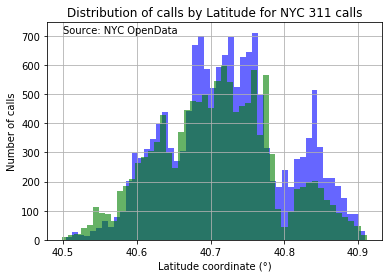

In [10]:
# to demonstrate simple layering
# we will create a histogram of NYPD=New York Police Department with the DOT=Department of transportation
# similar to that already demonstrated above
subset_values.hist(column='Latitude', facecolor="blue", alpha=0.6, bins=50)
plt.hist(calls[calls.Agency == 'DOT']['Latitude'].dropna(), facecolor="green", alpha=0.6, bins=50)

plt.annotate('Source: NYC OpenData', xy=(40.5, 710))
plt.xlabel('Latitude coordinate (°)')
plt.ylabel('Number of calls')
plt.title('Distribution of calls by Latitude for NYC 311 calls')

plt.show()

Data sourcing is a critical aspect of any data visualization. Although here we are simply referencing the agencies that created the data, it is ideal to provide as direct of a path as possible for the viewer to find the data the graph is based on. When this is not possible (e.g. the data is sequestered), directing the viewer to documentation or methodology for the data is a good alternative. Regardless, providing clear sourcing for the underlying data is an absolutely requirement of any respectable visualization, and further builds trusts and enables reproducibility.

### Introducing seaborn

Seaborn is a popular visualization package built on top of matplotlib which makes some more cumbersome graphs easier to make, however it does not give direct access to the lower level objects in a figure (more on that later).

/home/lmillan/.pyenv/versions/3.5.2/envs/python_3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


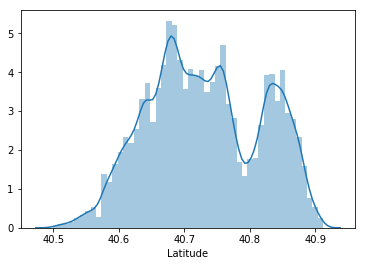

In [11]:
## Barplot function in seaborn
sns.distplot(calls.Latitude.dropna())
plt.show()

You can see how this function works by using the `help` function:

In [12]:
help(sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
    Flexibly plot a univariate distribution of observations.
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and plot the estimated PDF over the data.
    
    Parameters
    ----------
    
    a : Series, 1d-array, or list.
        Observed data. If this is a Series object with a ``name`` attribute,
        the name will be used to label the data axis.
    bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins, or None to use Freedman-Diaconis rule.
    hist : bool, optional
        Whether to plot 

Lets add a rug! 

/home/lmillan/.pyenv/versions/3.5.2/envs/python_3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


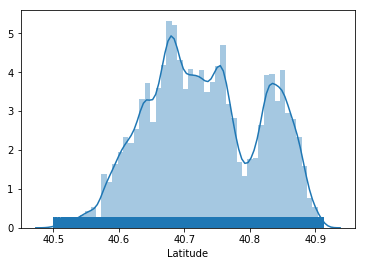

In [13]:
sns.distplot(calls.Latitude.dropna(), rug=True)

### Combining seaborn and matplotlib

There are many excellent data visualiation modules available in Python, but for the tutorial we will stick to the tried and true combination of matplotlib and seaborn.

Below, we use seaborn for setting an overall aesthetic style and then faceting (created small multiples). We then use matplotlib to set very specific adjustments - things like adding the title, adjusting the locations of the plots, and sizing th graph space. This is a pretty protoyptical use of the power of these two libraries together.

More on seaborn's [set_style function](https://seaborn.pydata.org/generated/seaborn.set_style.html). More on [matplotlib's figure](https://matplotlib.org/api/figure_api.html) (fig) API.

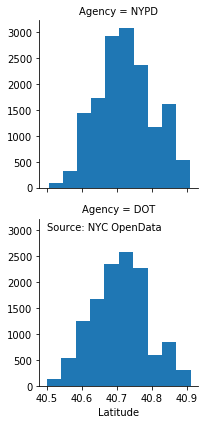

In [14]:
## Seaborn offers a powerful tool called FacetGrid for making small multiples of matplotlib graphs:

### Create an empty set of grids:
facet_histograms = sns.FacetGrid(calls[calls.Agency.isin(['NYPD','DOT'])][['Latitude','Agency']].dropna(), 
                                 row='Agency')

## "map' a histogram to each grid:
facet_histograms = facet_histograms.map(plt.hist, 'Latitude')

## Data Sourcing:
plt.annotate('Source: NYC OpenData', xy=(40.5, 3001))

plt.show()

### Exporting Completed Graphs

When you are satisfied with your visualization, you may want to save a a copy outside of your notebook. You can do this with matplotlib's savefig function. You simply need to run:

`plt.savefig("fileName.fileExtension")`

The file extension is actually surprisingly important. Image formats like png and jpeg are actually not ideal. These file formats store your graph as a giant grid of pixels, which is space-efficient, but can't be edited later. Saving your visualizations instead as a PDF is strongly advised. PDFs are a type of vector image, which means all the components of the graph will be maintained.

With PDFs, you can later open the image in a program like Adobe Illustrator and make changes like the size or typeface of your text, move your legends, or adjust the colors of your visual encodings. All of this would be impossible with a png or jpeg.

### Aditional resources

+ [A Thorough Comparison of Python's DataViz Modules](https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/)
+ [Seaborn Documentation](https://seaborn.pydata.org/)
+ [Matplotlib Documentation](https://matplotlib.org/)
+ Other Python Visualization Libraries:
    + [Bokeh](https://bokeh.pydata.org/en/latest/)
    + [Altair](https://altair-viz.github.io/)
    + [Plotly](https://plot.ly/python/)
